In [1]:
# HIDE CODE
import deps
from importlib import reload
reload(deps)

alldat, dat_LFP, dat_ST = deps.get_data()
dat = alldat[15]
# sp, neu, trial_starts = deps.convert_raster_to_spiketimes(dat)
dat_st=dat_ST[15]['ss']
sp, neu, trial_starts = deps.concat_spiketimes(dat_st)
events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                        event_names=('gocue', 'response_time','feedback_time'),
                                        condition_names=('response','contrast_right','contrast_left','feedback_type'))

spykes_times = deps.spykes_get_times(sp, neu,thr_n_spikes=55)
spykes_times = deps.spykes_add_brain_regions(spykes_times, dat['brain_area'])

This dataset has ['CA3' 'LGd' 'MB' 'SSp' 'SSs' 'TH'], meaning ['other ctx' 'midbrain' 'thal' 'hipp']


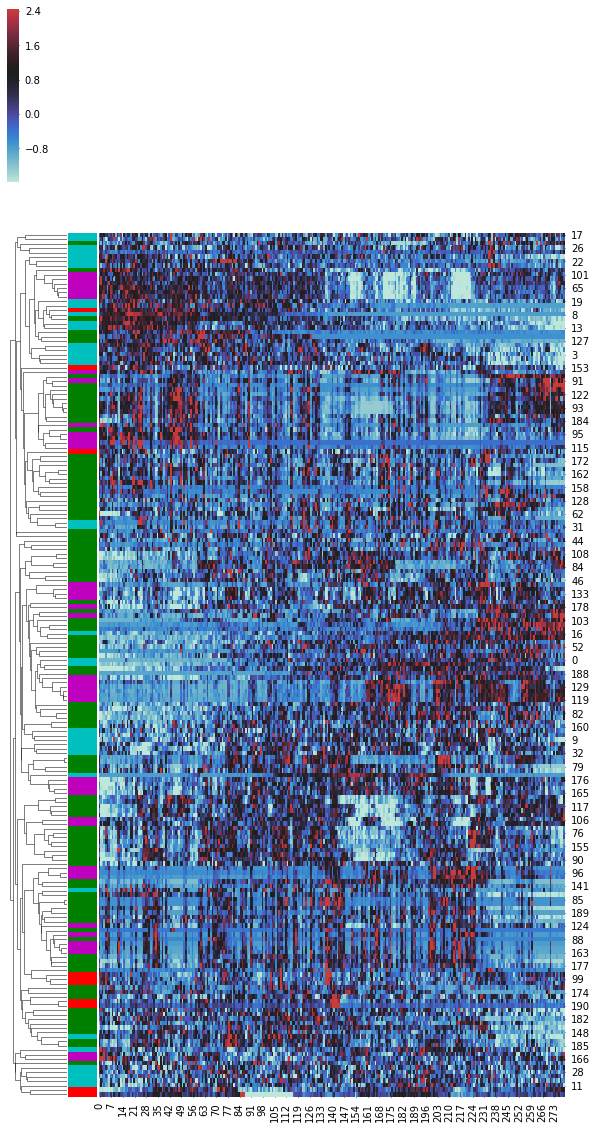

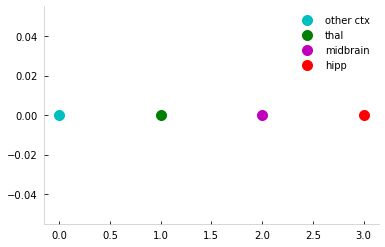

In [2]:
# HIDE CODE
deps.cluster_trial_start(dat['spks'], deps.spykes_get_brain_regions(dat['brain_area']))

======= time_gocue / response =======


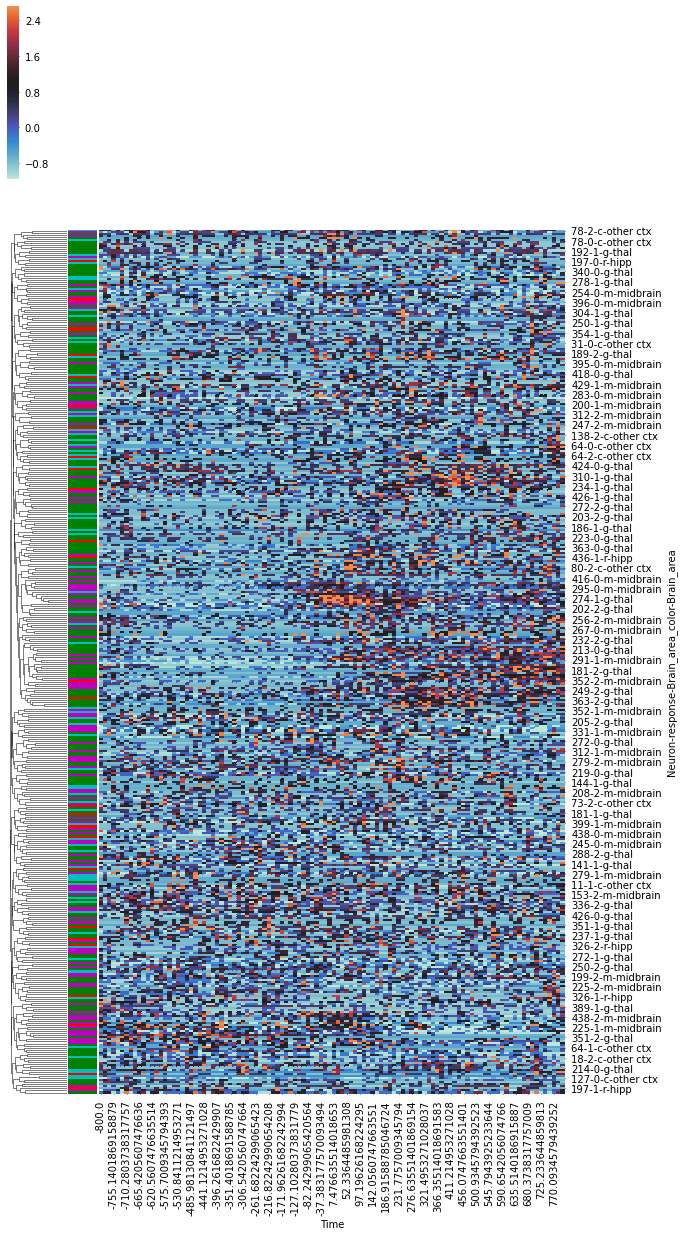

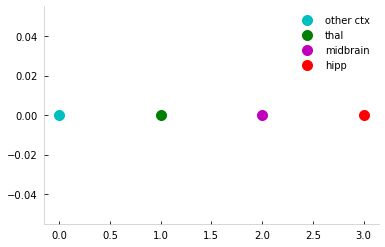

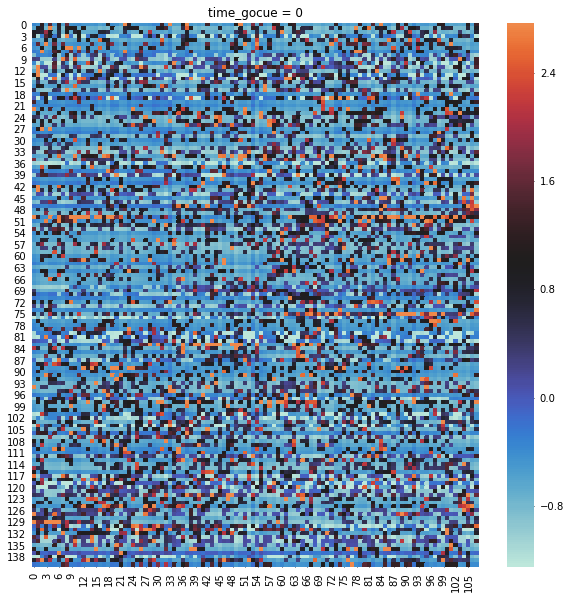

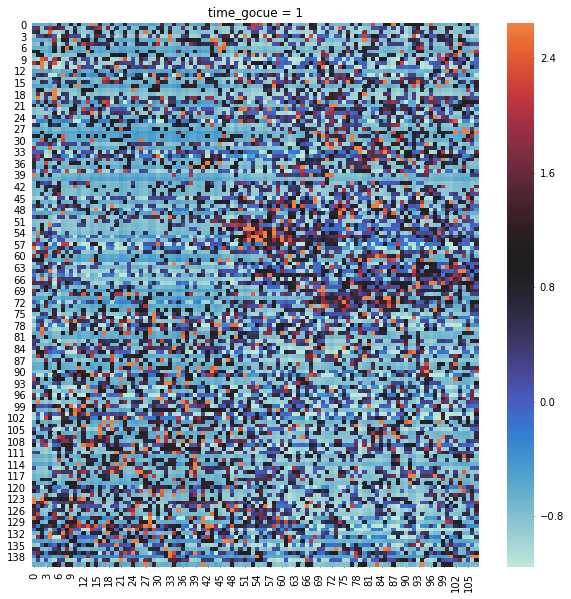

======= time_gocue / contrast_right =======


NaN dissimilarity value.
======= time_gocue / contrast_left =======


NaN dissimilarity value.
======= time_gocue / feedback_type =======


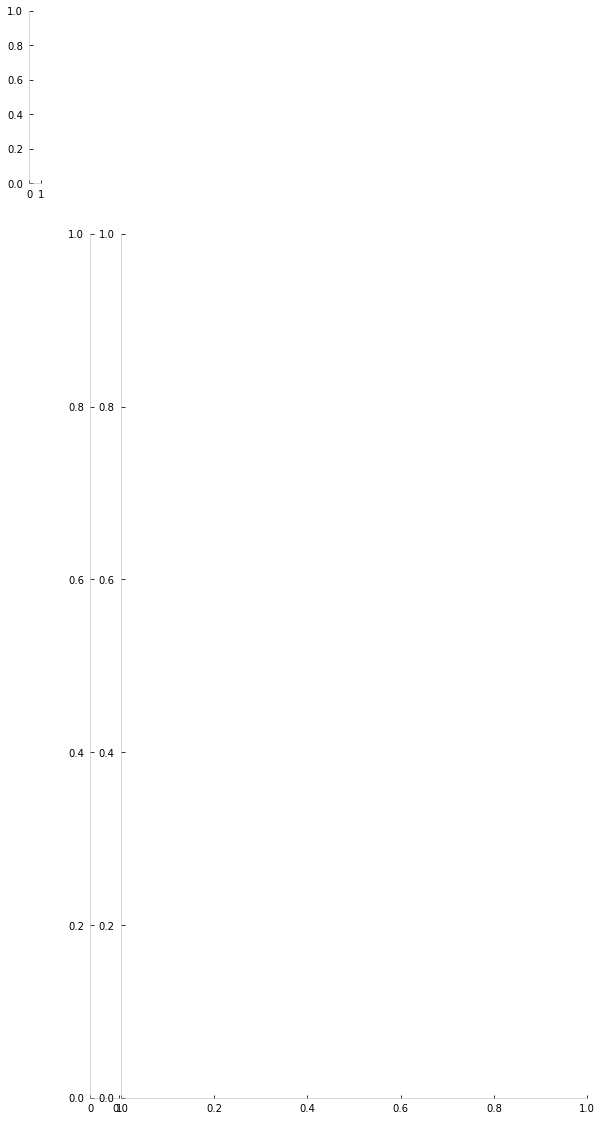

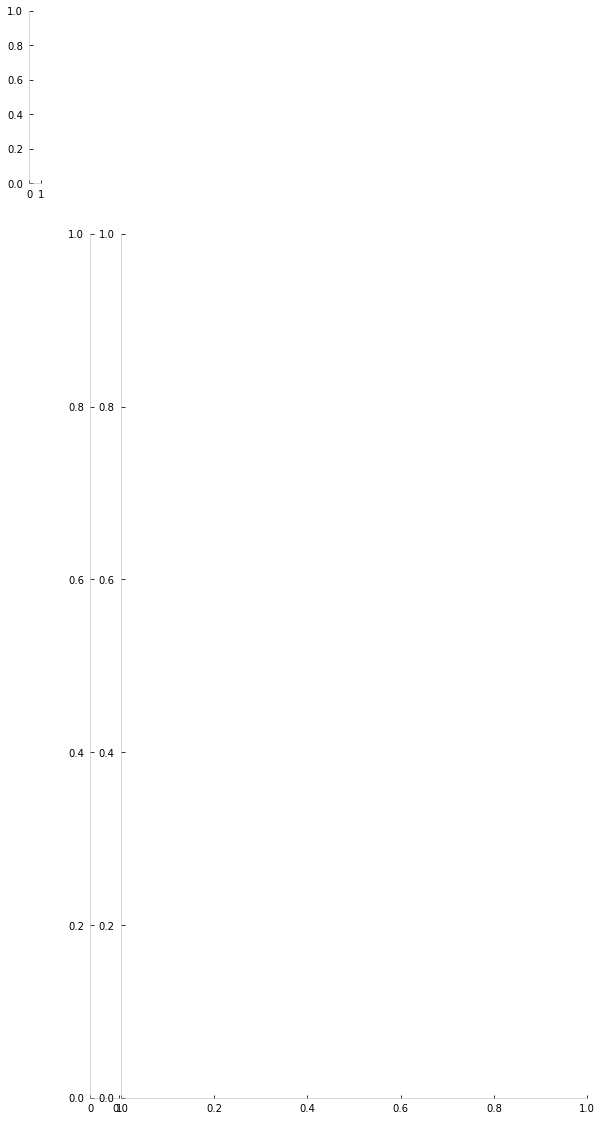

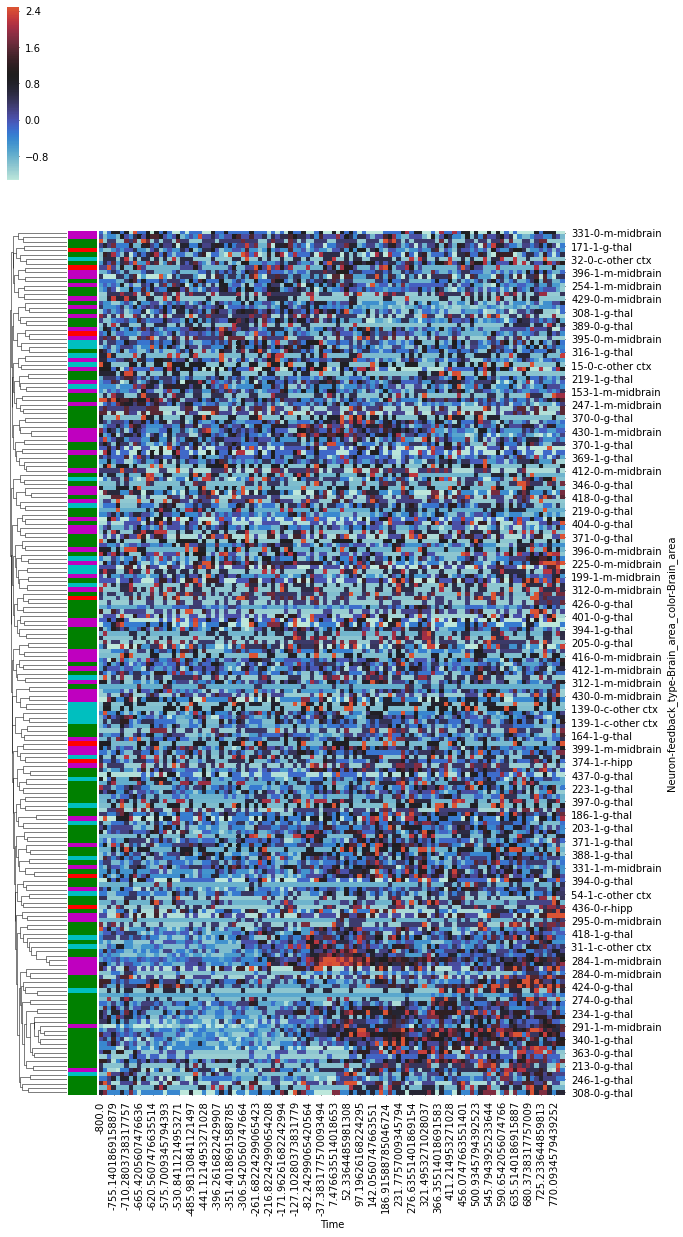

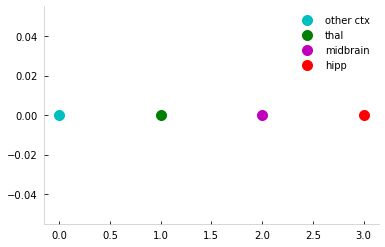

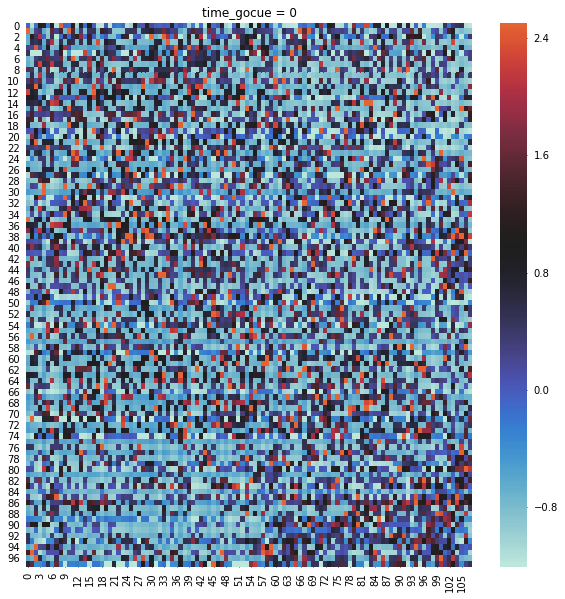

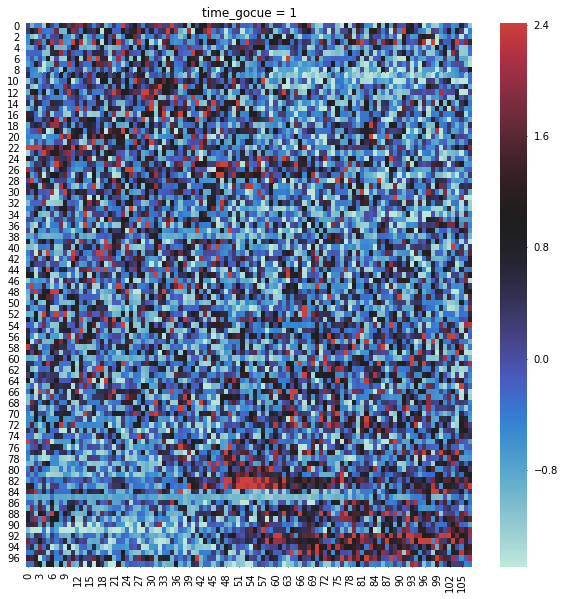

======= time_response / response =======


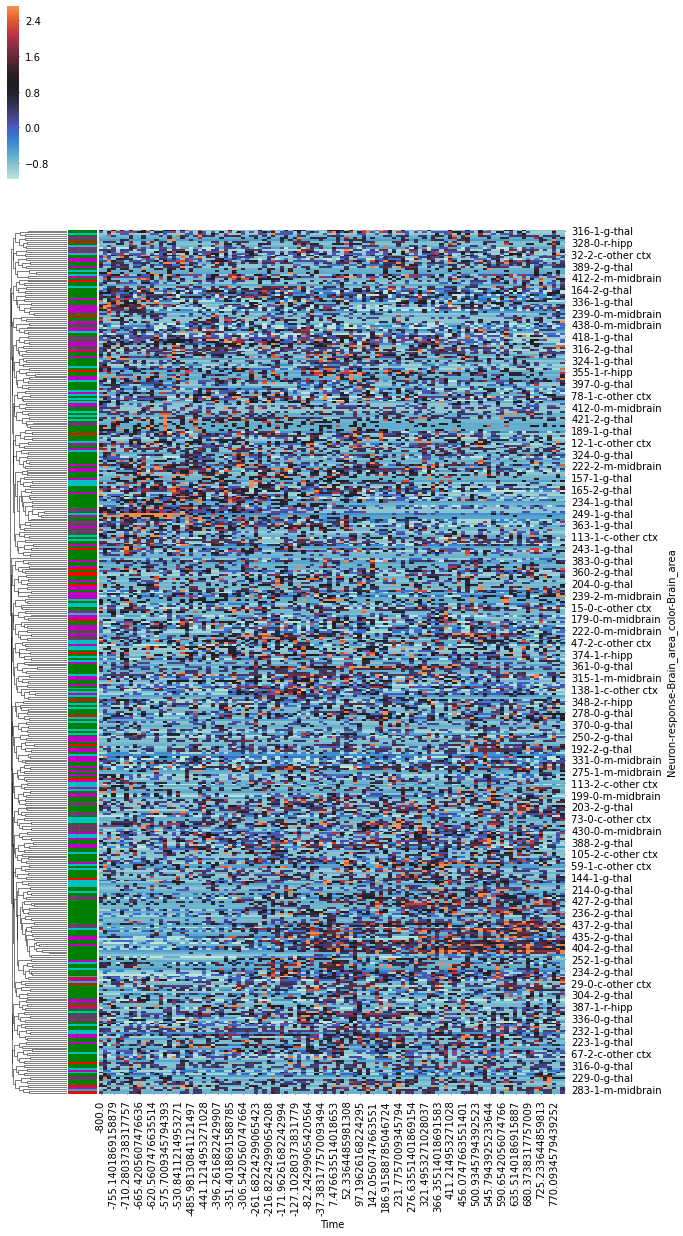

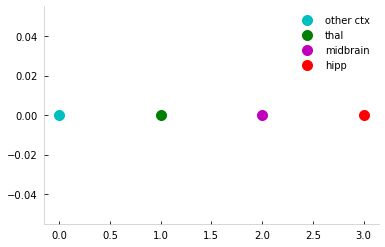

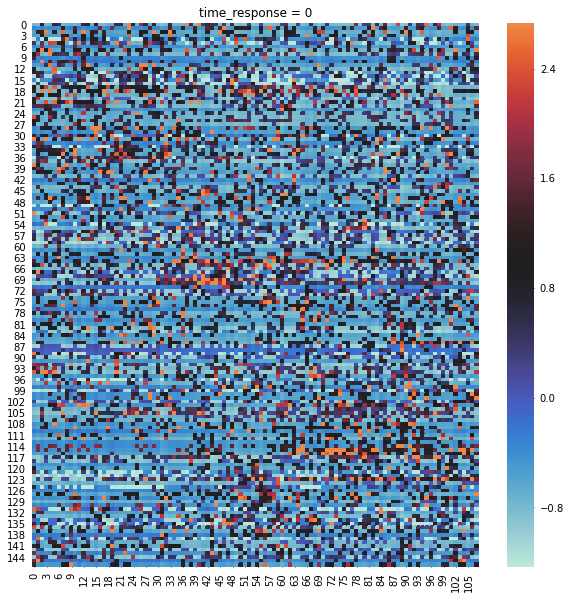

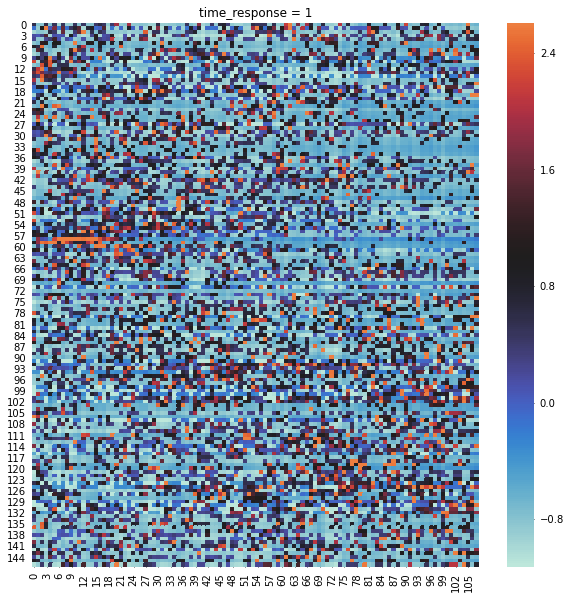

======= time_response / contrast_right =======


NaN dissimilarity value.
======= time_response / contrast_left =======


NaN dissimilarity value.
======= time_response / feedback_type =======


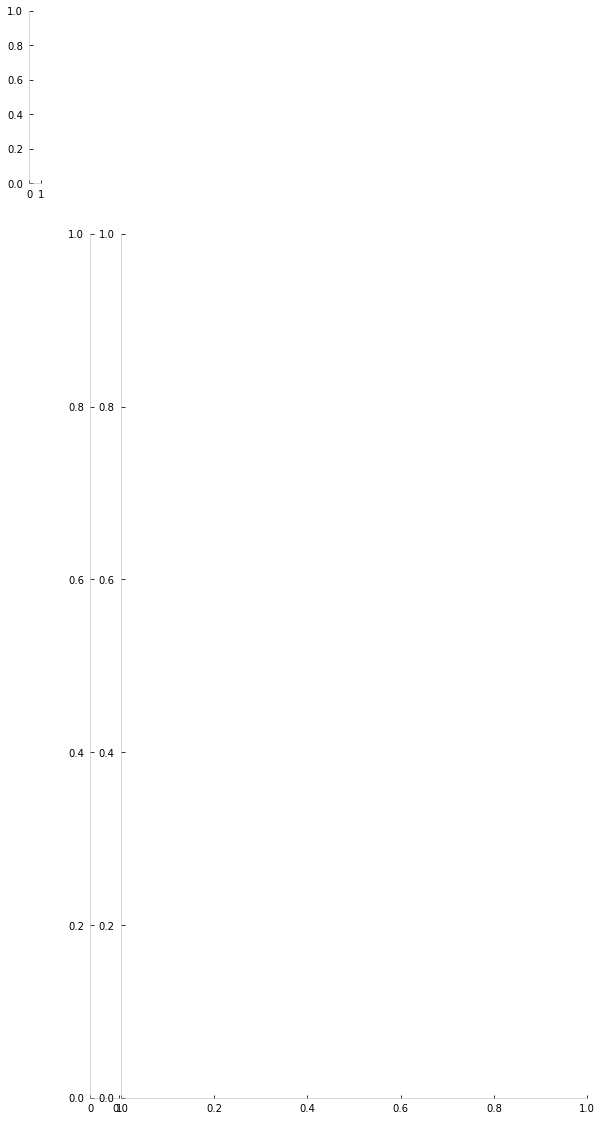

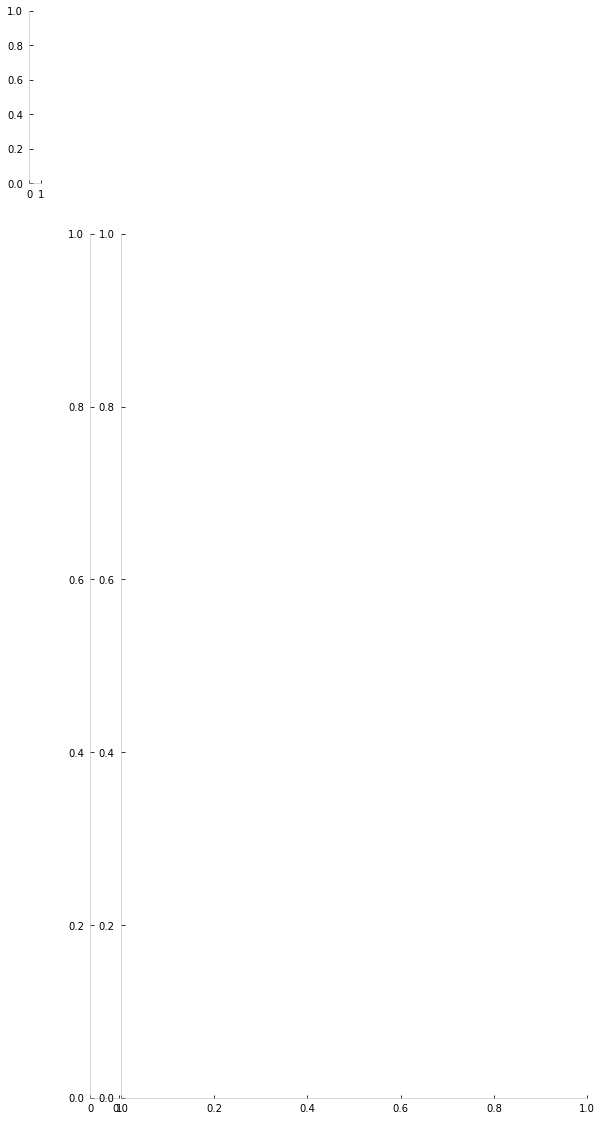

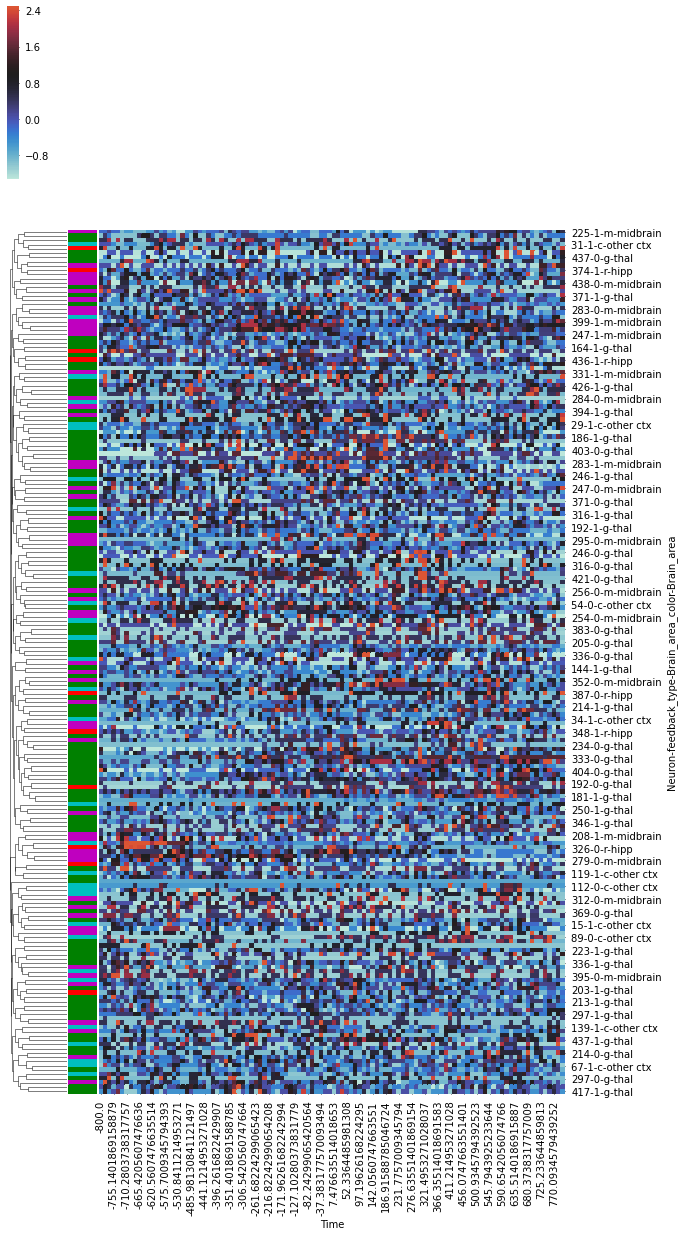

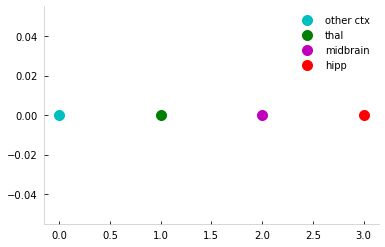

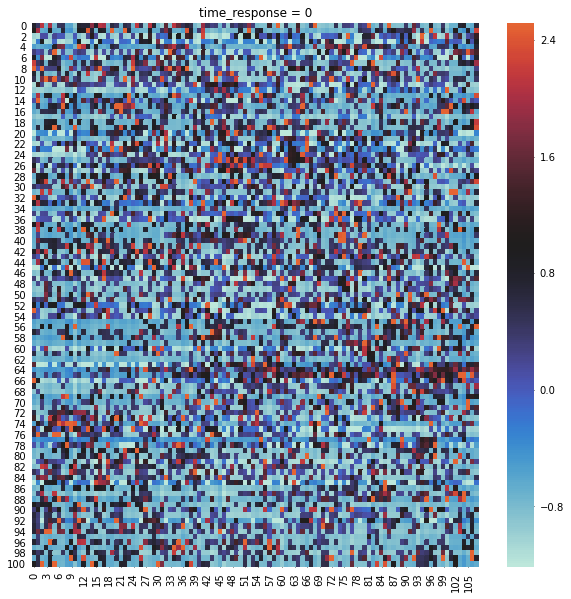

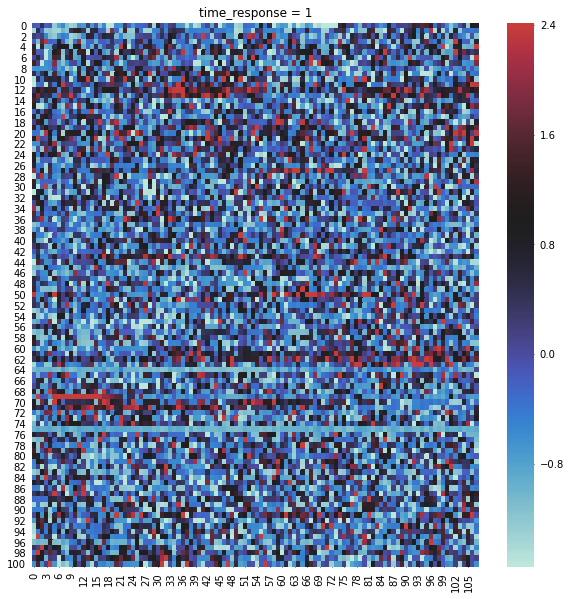

======= time_feedback / response =======


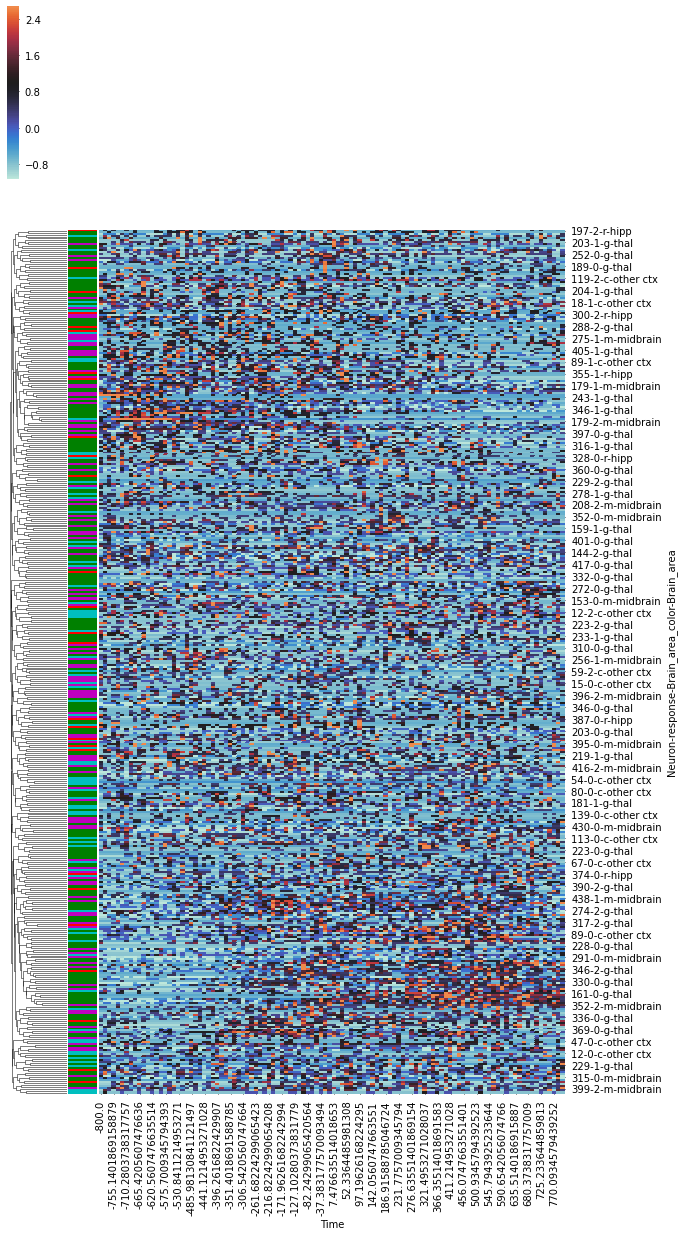

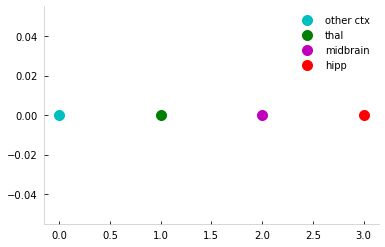

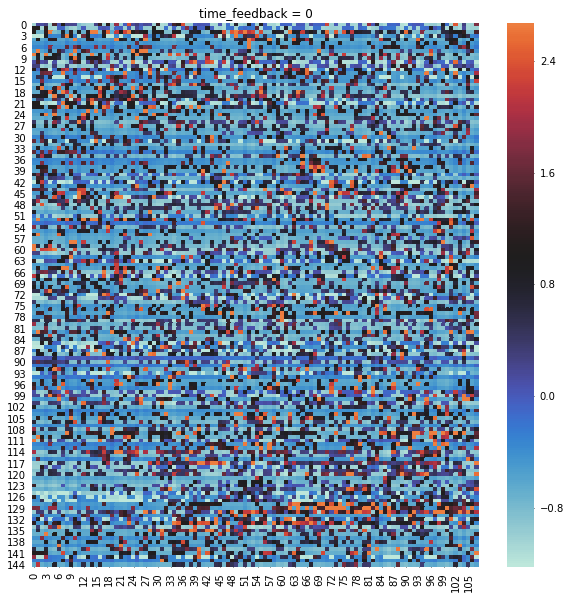

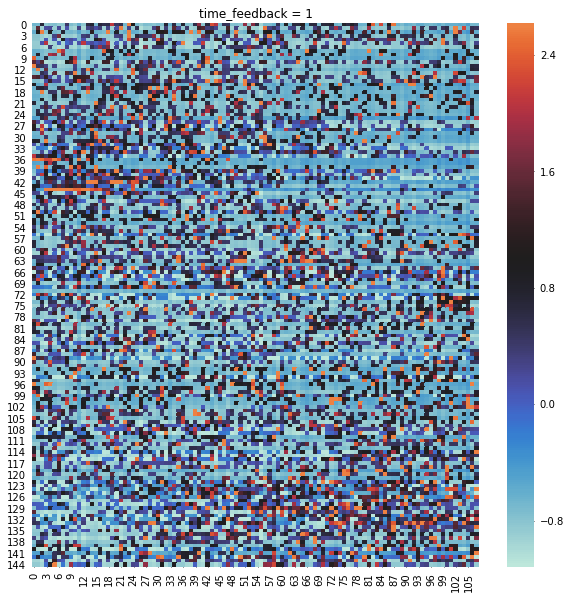

======= time_feedback / contrast_right =======


NaN dissimilarity value.
======= time_feedback / contrast_left =======


NaN dissimilarity value.
======= time_feedback / feedback_type =======


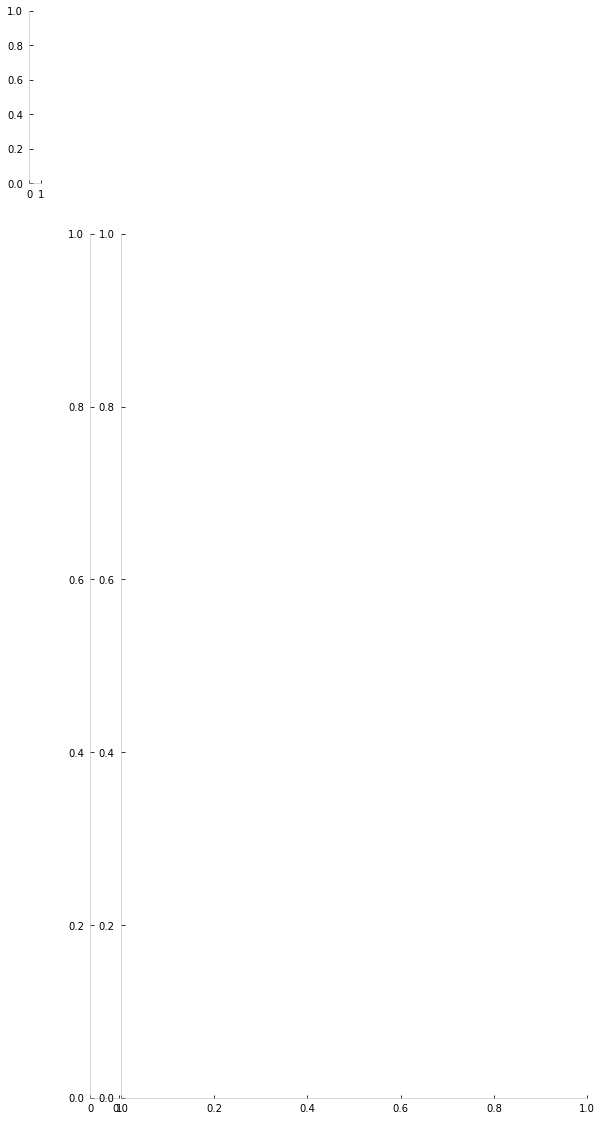

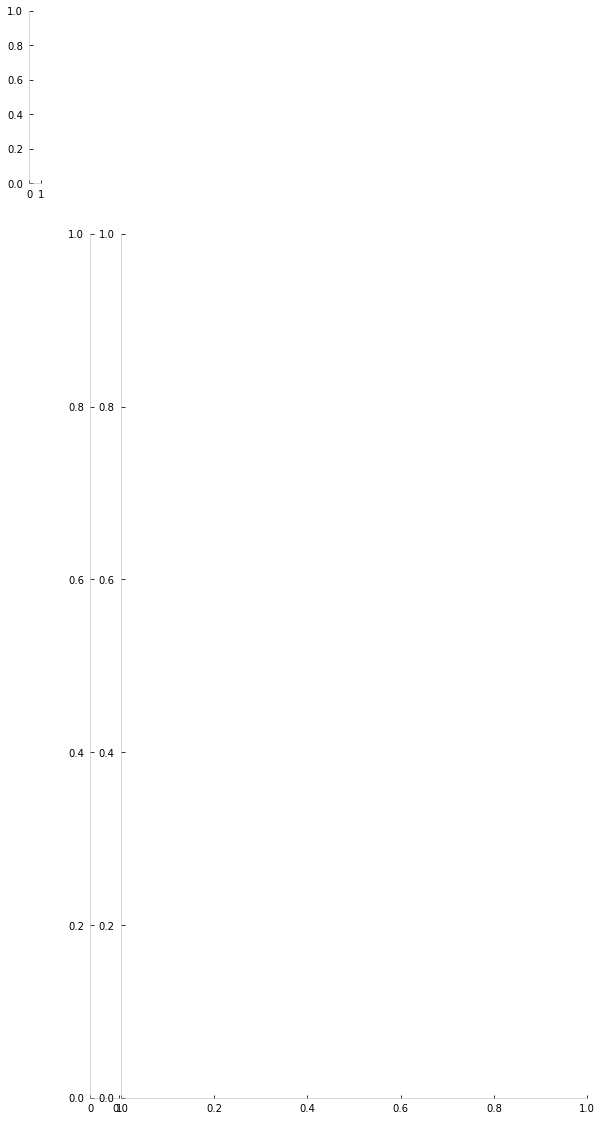

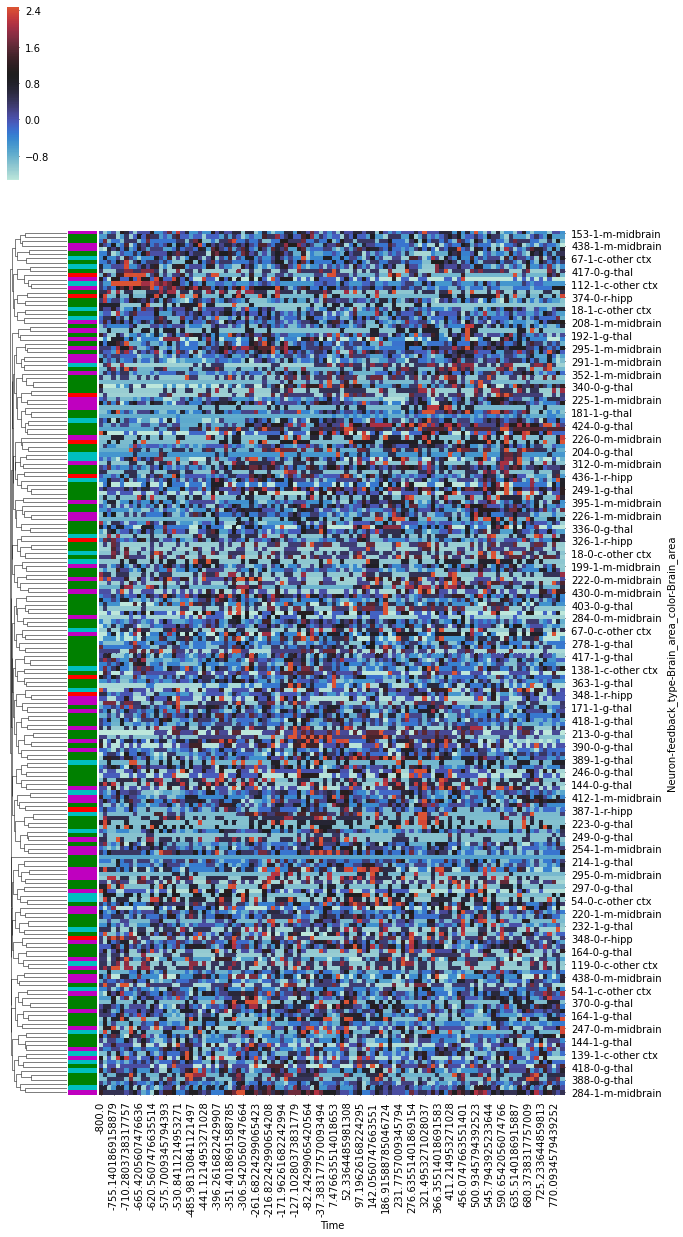

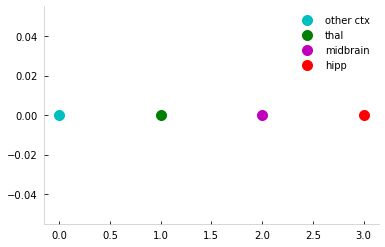

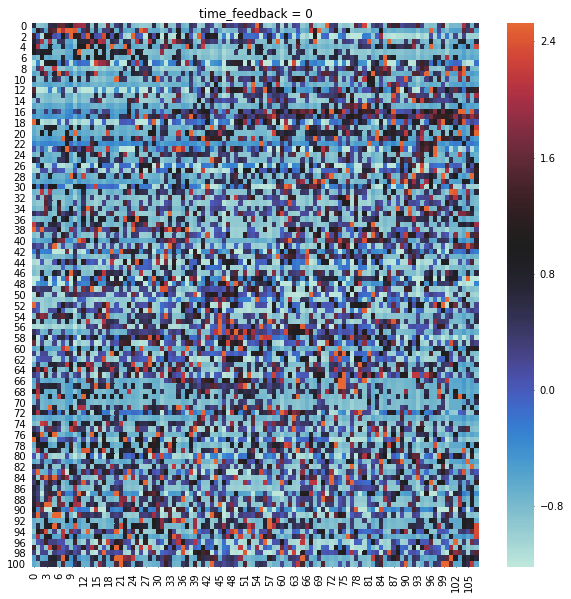

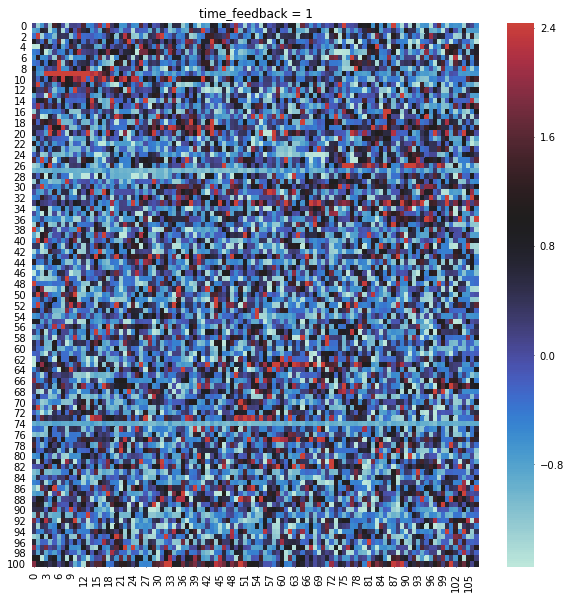

In [3]:
# HIDE CODE
for event_name in events_df.columns[events_df.columns.str.contains('time')]:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        print(f"======= {event_name} / {condition_name} =======")
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=[-800, 800],  
                               bin_size=15,
                               )
        # Make psth
        xar=deps.spyke2xar(all_psth,
                           spykes_times['brain_group'].values,  
                           spykes_times['brain_group_color'].values)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True,thr_n_spikes=30)